In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/f1/1727nmns4pn3qwy09yz08x2r0000gn/T/ipykernel_23816/202762675.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('plasma')


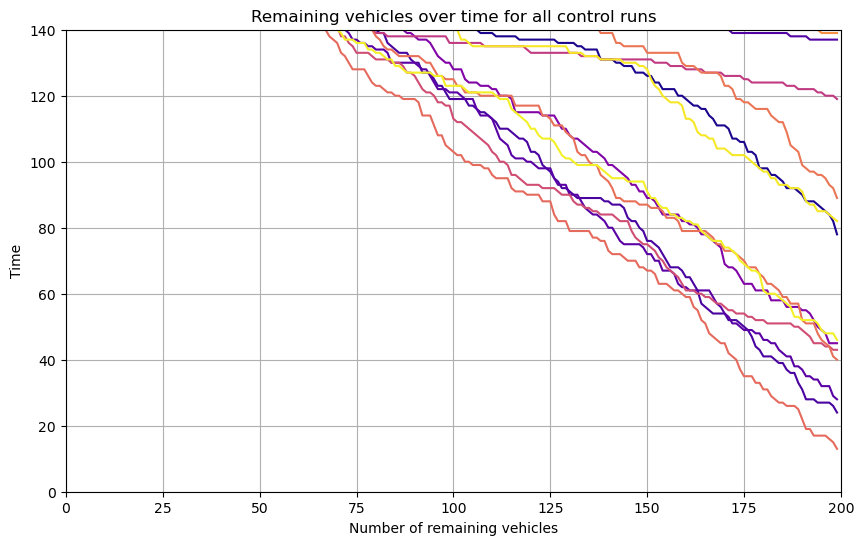

In [2]:
csv_file = 'control_vehicles.csv'

data = []
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append([float(x) for x in row])
        
colormap = cm.get_cmap('plasma')
num_lines = len(data)
        
plt.figure(figsize=(10, 6))
for idx, numbers in enumerate(data):
    color = colormap(idx / num_lines)  # Scale index to [0, 1] range for the colormap
    plt.plot(numbers, color=color, label=f'Line {idx+1}')

plt.xlabel('Number of remaining vehicles')
plt.ylabel('Time')
plt.ylim(0, 140)
plt.xlim(0, 200)
plt.title('Remaining vehicles over time for all control runs')
plt.grid(True)
plt.show()

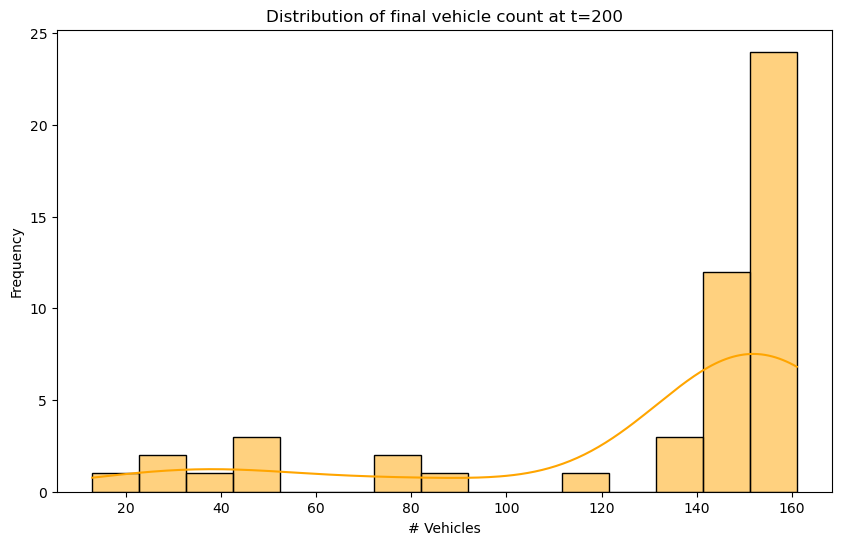

In [3]:
final_vehicle_count = [d[-1] for d in data]
plt.figure(figsize=(10, 6))
sns.histplot(final_vehicle_count, bins=15, kde=True, color='orange', edgecolor='black') 
plt.xlabel('# Vehicles')
plt.ylabel('Frequency')
plt.title('Distribution of final vehicle count at t=200')
plt.show()

In [4]:
# compute standard deviation and mean of final vehicle count
std = np.std(final_vehicle_count)
mean = np.mean(final_vehicle_count)
std, mean

(42.8877091950596, 130.62)